In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 加载图像并转换为灰度图像
img = cv2.imread('./2-2.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 高斯滤波去除噪声
gray_blur = cv2.GaussianBlur(gray, (9, 9), 0)

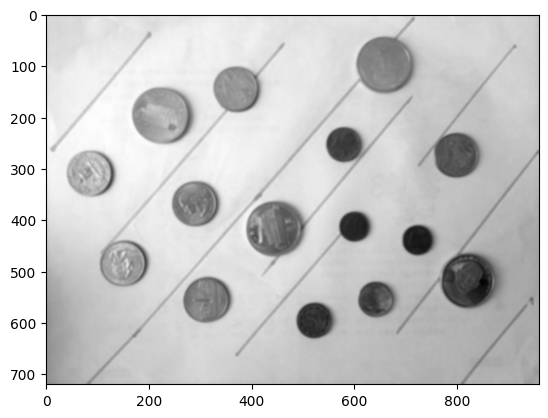

In [3]:
plt.imshow(gray_blur, cmap='gray')

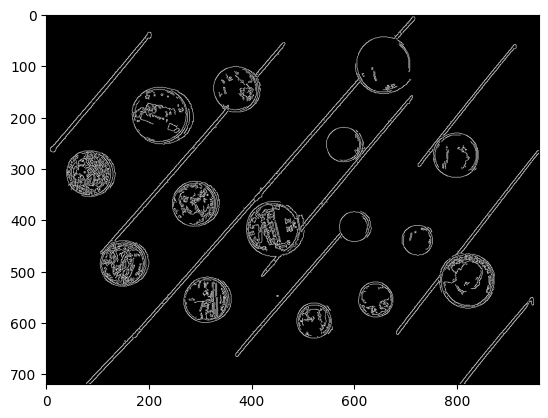

In [4]:
# 边缘检测
edges = cv2.Canny(gray, 50, 150, apertureSize=3)
plt.imshow(edges, cmap='gray')

In [5]:
# 使用Hough圆变换检测硬币
circles = cv2.HoughCircles(edges, cv2.HOUGH_GRADIENT, 1, 100,
                           param1=50, param2=50, minRadius=0, maxRadius=100)

# 统计检测到的硬币数量
num_coins = 0
if circles is not None:
    circles = np.round(circles[0, :]).astype('int')
    num_coins = len(circles)
    for (x, y, r) in circles:
        cv2.circle(img, (x, y), r, (0, 255, 0), 2)
        cv2.putText(img, str(num_coins), (100,100), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 0, 255), 3)

In [6]:
# 使用Hough线变换检测线条
edges = cv2.Canny(edges, 50, 50, apertureSize=3)
lines = cv2.HoughLines(edges, 1, np.pi/180, 200)

# 统计检测到的线条数量
num_lines = 0
if lines is not None:
    num_lines = len(lines)
    for line in lines:
        rho, theta = line[0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * a)
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * a)
        cv2.line(img, (x1, y1), (x2, y2), (0, 0, 255), 2)
        cv2.putText(img, str(num_lines), (200, 200), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 255, 0), 3)

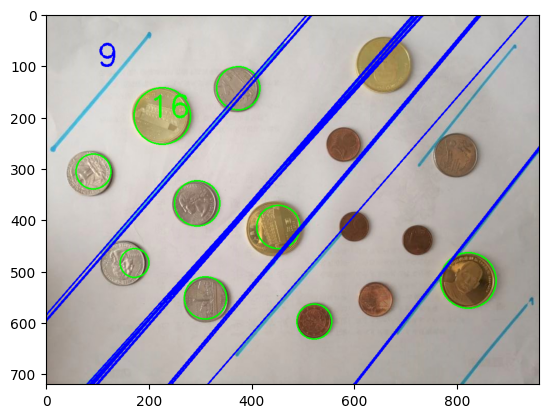

In [7]:
plt.imshow(img)

In [8]:
print("Number of coins:", num_coins)
print("Number of lines:", num_lines)

Number of coins: 9
Number of lines: 16
